In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io
%pip install opencv-python
import cv2
import pandas as pd
import h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
file_path = 'datasets/train_catvnoncat.h5'
train_dataset = h5py.File(file_path, 'r')

In [9]:
images = {}
for image in train_dataset.keys():
    train_image = train_dataset[image]
    img_plt = Image.open(io.BytesIO(np.array(train_image)))
    img_array = np.array(img_plt)
    images[image] = img_array

images_label = list(images.keys())
images_array = list(images.values())

plt.figure(figsize=(16, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images_array[i])
    plt.title(images_label[i])
    plt.axis('off')
plt.show()

ValueError: Invalid location identifier (invalid location identifier)

Keys in the HDF5 file: ['train_set_x', 'train_set_y']
Dataset shape: (57, 64, 64, 3)
Labels shape: (57,)


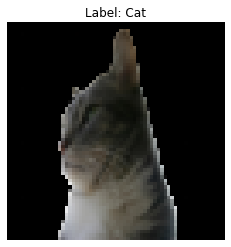

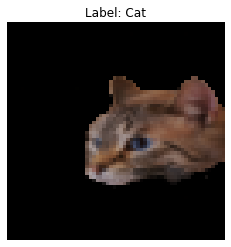

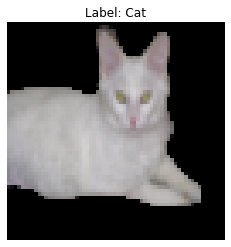

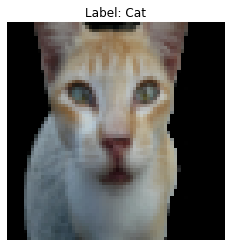

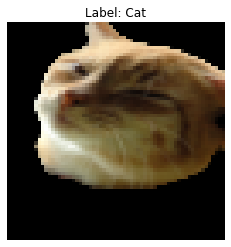

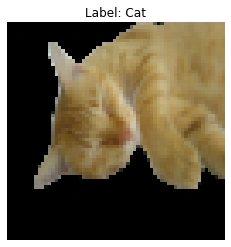

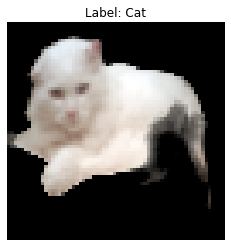

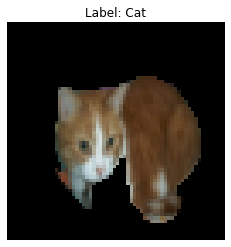

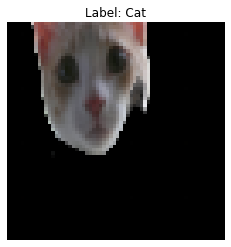

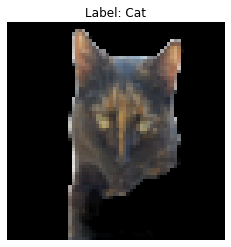

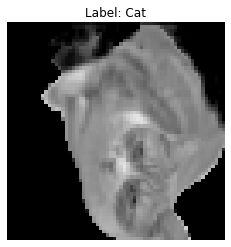

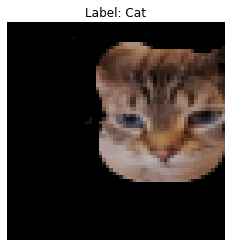

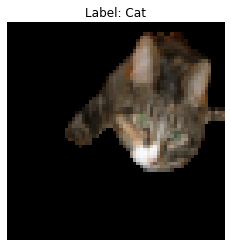

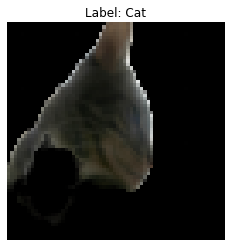

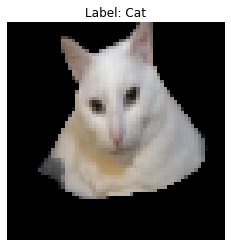

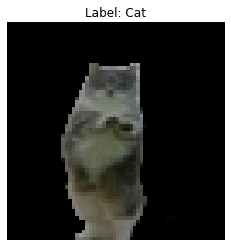

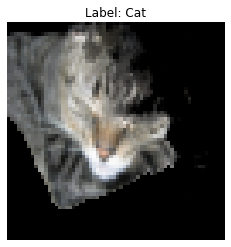

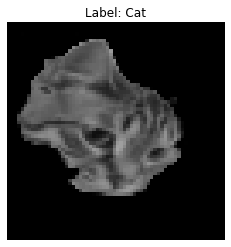

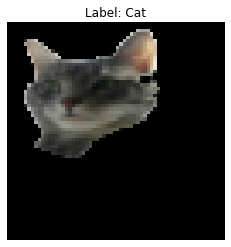

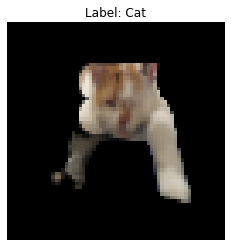

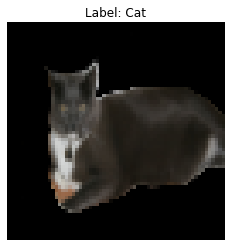

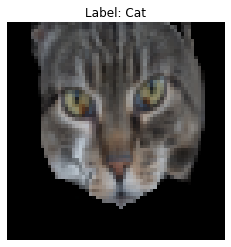

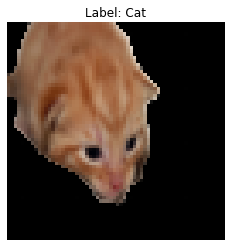

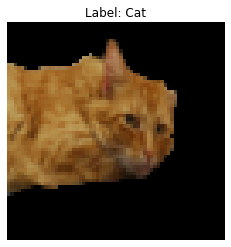

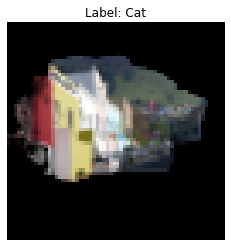

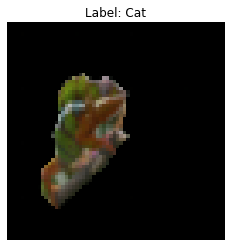

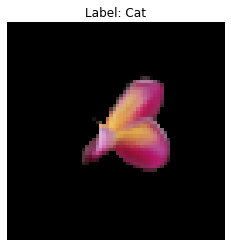

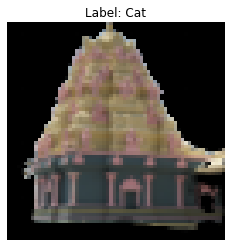

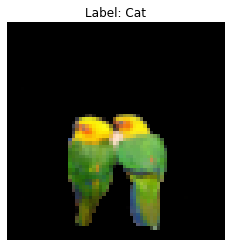

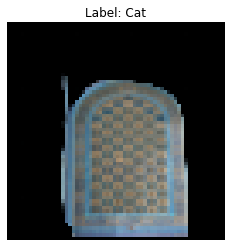

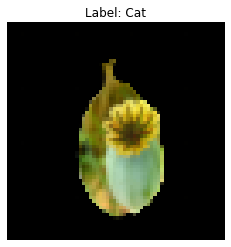

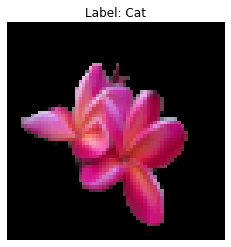

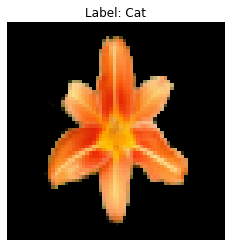

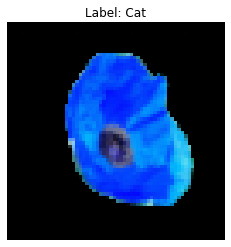

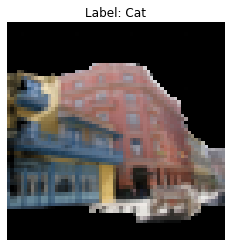

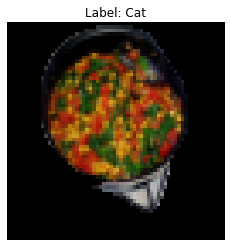

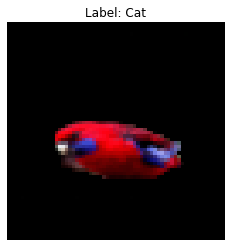

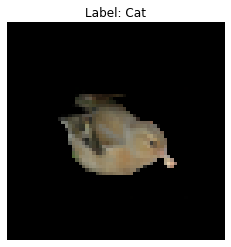

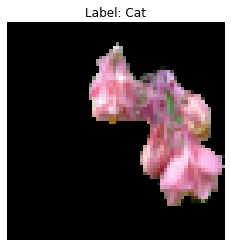

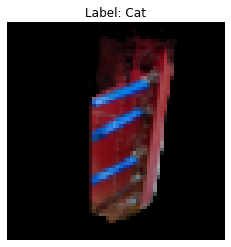

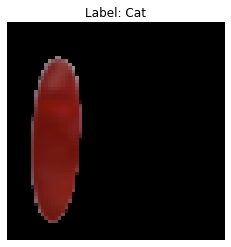

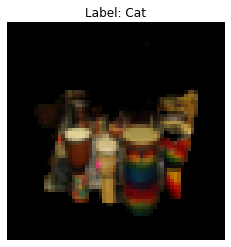

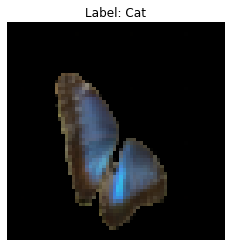

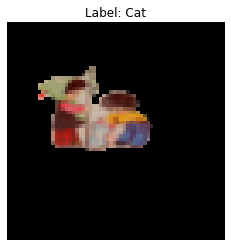

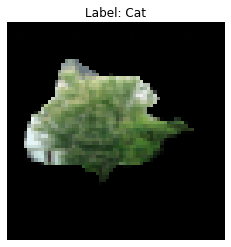

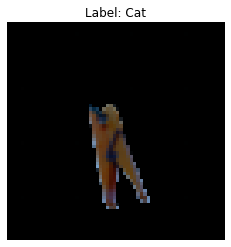

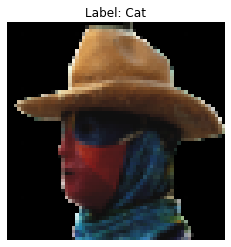

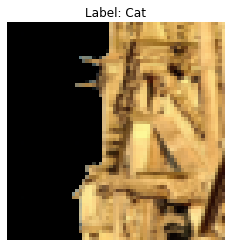

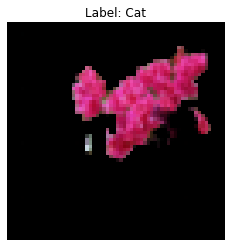

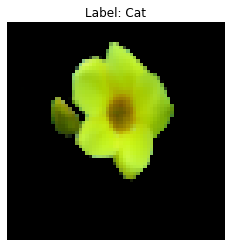

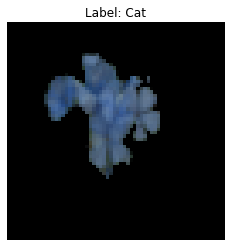

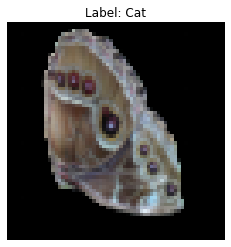

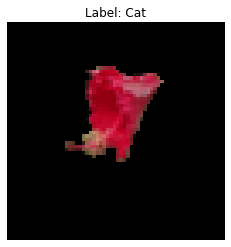

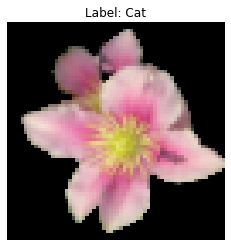

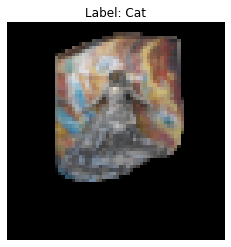

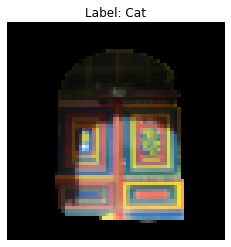

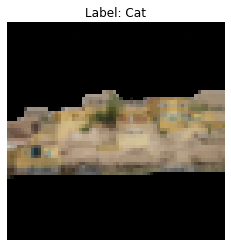

IndexError: index 57 is out of bounds for axis 0 with size 57

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the HDF5 file
file_path = "datasets/train_catvnoncat.h5"

with h5py.File(file_path, "r") as f:
    # Print available keys in the file
    print("Keys in the HDF5 file:", list(f.keys()))  

    # Assuming images are stored under 'train_set_x' and labels under 'train_set_y'
    images = np.array(f["train_set_x"])  
    labels = np.array(f["train_set_y"])  # Labels: 1 = Cat, 0 = Not Cat

    print(f"Dataset shape: {images.shape}")  # Check the shape (num_samples, height, width, channels)
    print(f"Labels shape: {labels.shape}")

    # Display the first image with label
    for i in range(0,100):
        plt.imshow(images[i])
        plt.title(f"Label: {'Cat' if labels[0] == 1 else 'Not Cat'}")
        plt.axis("off")
        plt.show()



In [24]:
import h5py
import numpy as np
from PIL import Image
import os

# Load the HDF5 file
file_path = "datasets/train_catvnoncat.h5"
output_folder = "extracted_images"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

with h5py.File(file_path, "r") as f:
    images = np.array(f["train_set_x"])  # Load images
    labels = np.array(f["train_set_y"])  # Load labels (1 = Cat, 0 = Not Cat)

    for i in range(images.shape[0]):
        img = Image.fromarray(images[i])  # Convert NumPy array to PIL image
        label = "cat" if labels[i] == 1 else "not_cat"
        img.save(f"{output_folder}/{label}_{i}.png")  # Save as PNG

print(f"Images saved in '{output_folder}' folder.")


Images saved in 'extracted_images' folder.


In [25]:
import h5py
import numpy as np
from PIL import Image
import os

# Folder where cleaned images are stored
image_folder = "extracted_images_1"
output_h5_file = "datasets/processed_catvnoncat.h5"

# Collect image filenames
image_files = sorted(os.listdir(image_folder))  # Sort to maintain order

# Lists to store images and labels
images = []
labels = []

for file in image_files:
    img_path = os.path.join(image_folder, file)
    img = Image.open(img_path).convert("RGB")  # Ensure RGB format
    img = np.array(img)  # Convert to NumPy array

    images.append(img)

    # Assign labels based on filename (assumes 'cat_' or 'not_cat_' naming convention)
    label = 1 if "cat" in file else 0
    labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images, dtype=np.uint8)  # Convert images to 8-bit format
labels = np.array(labels, dtype=np.uint8)  # Labels should be integers

# Save to HDF5
with h5py.File(output_h5_file, "w") as f:
    f.create_dataset("train_set_x", data=images)
    f.create_dataset("train_set_y", data=labels)

print(f"Processed images saved to '{output_h5_file}'.")


Processed images saved to 'datasets/processed_catvnoncat.h5'.


In [26]:
with h5py.File("datasets/processed_catvnoncat.h5", "r") as f:
    print("Keys in HDF5 file:", list(f.keys()))
    print("Shape of images:", f["train_set_x"].shape)
    print("Shape of labels:", f["train_set_y"].shape)


Keys in HDF5 file: ['train_set_x', 'train_set_y']
Shape of images: (114, 64, 64, 3)
Shape of labels: (114,)


In [2]:
import h5py
import numpy as np
from PIL import Image
import os

# Define the folder where datasets should be saved
save_folder = "datasets"
os.makedirs(save_folder, exist_ok=True)  # Ensure folder exists

train_h5_file = os.path.join(save_folder, "train_catvnoncat.h5")
test_h5_file = os.path.join(save_folder, "test_catvnoncat.h5")

# Define paths where images are stored
train_folder = "extracted_images/train"
test_folder = "extracted_images/test"

# Function to load images and labels
def load_images_from_folder(folder):
    image_files = sorted(os.listdir(folder))  # Sort to maintain order
    images, labels = [], []

    for file in image_files:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("RGB")  # Ensure RGB format
        img = np.array(img)  # Convert to NumPy array
        images.append(img)

        # Assign labels based on filename (assumes 'cat_' or 'not_cat_' naming convention)
        label = 1 if "not_cat_" not in file else 0
        labels.append(label)

    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.uint8)

# Load train and test sets
train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# Save train dataset
with h5py.File(train_h5_file, "w") as f:
    f.create_dataset("train_set_x", data=train_images)
    f.create_dataset("train_set_y", data=train_labels)

# Save test dataset
with h5py.File(test_h5_file, "w") as f:
    f.create_dataset("test_set_x", data=test_images)
    f.create_dataset("test_set_y", data=test_labels)
    f.create_dataset("list_classes", data=np.array([b'non-cat', b'cat'], dtype='S'))  # Store class names

print(f"Train and test datasets saved in {save_folder}!")


BlockingIOError: [Errno 35] Unable to create file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [40]:
import os
import shutil
import random

# Define paths
source_folder = "extr"  # Change this to your actual source folder
train_folder = "extr/train"
test_folder = "extr/test"

# Create train and test directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get all image files from the source folder
all_images = [f for f in os.listdir(source_folder) if f.endswith((".png", ".jpg", ".jpeg"))]

# Shuffle images randomly
random.shuffle(all_images)

# Split into train and test sets
# Change this line
split_index = int(len(all_images) * 0.7)  # 70% for training, 30% for testing
train_images = all_images[:split_index]
test_images = all_images[split_index:]

# Move images to respective folders
for img in train_images:
    shutil.move(os.path.join(source_folder, img), os.path.join(train_folder, img))

for img in test_images:
    shutil.move(os.path.join(source_folder, img), os.path.join(test_folder, img))

print(f"Moved {len(train_images)} images to {train_folder}")
print(f"Moved {len(test_images)} images to {test_folder}")


Moved 102 images to extr/train
Moved 45 images to extr/test


In [41]:
import h5py
import numpy as np
from PIL import Image
import os

def load_images_from_folder(folder, num_cats):
    image_files = sorted(os.listdir(folder))
    images, labels = [], []
    
    # Fixed: enumerate the files to get both index and filename
    for idx, file in enumerate(image_files):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("RGB")
        img = img.resize((64, 64))
        images.append(np.array(img, dtype=np.uint8))
        
        # Manual labeling based on position
        if idx < num_cats:
            labels.append(1)  # Cat
        else:
            labels.append(0)  # Non-cat
            
        print(f"Processing image {idx + 1}: {'cat' if idx < num_cats else 'non-cat'}")
    
    return np.array(images), np.array(labels, dtype=np.uint8).reshape(-1, 1)

# Define paths
save_folder = "datasets"
os.makedirs(save_folder, exist_ok=True)
train_folder = "extracted_images/train"
test_folder = "extracted_images/test"

# Process datasets with manual counts
train_images, train_labels = load_images_from_folder(train_folder, num_cats=21)  # First 24 are cats
test_images, test_labels = load_images_from_folder(test_folder, num_cats=48)    # First 19 are cats

# Save to H5 files
with h5py.File(os.path.join(save_folder, "train_catvnoncat.h5"), "w") as f:
    f.create_dataset("train_set_x", data=train_images)
    f.create_dataset("train_set_y", data=train_labels)
    f.create_dataset("list_classes", data=np.array([b'non-cat', b'cat'], dtype='S'))

with h5py.File(os.path.join(save_folder, "test_catvnoncat.h5"), "w") as f:
    f.create_dataset("test_set_x", data=test_images)
    f.create_dataset("test_set_y", data=test_labels)
    f.create_dataset("list_classes", data=np.array([b'non-cat', b'cat'], dtype='S'))


Processing image 1: cat
Processing image 2: cat
Processing image 3: cat
Processing image 4: cat
Processing image 5: cat
Processing image 6: cat
Processing image 7: cat
Processing image 8: cat
Processing image 9: cat
Processing image 10: cat
Processing image 11: cat
Processing image 12: cat
Processing image 13: cat
Processing image 14: cat
Processing image 15: cat
Processing image 16: cat
Processing image 17: cat
Processing image 18: cat
Processing image 19: cat
Processing image 20: cat
Processing image 21: cat
Processing image 22: non-cat
Processing image 23: non-cat
Processing image 24: non-cat
Processing image 25: non-cat
Processing image 26: non-cat
Processing image 27: non-cat
Processing image 28: non-cat
Processing image 29: non-cat
Processing image 30: non-cat
Processing image 31: non-cat
Processing image 32: non-cat
Processing image 33: non-cat
Processing image 34: non-cat
Processing image 35: non-cat
Processing image 36: non-cat
Processing image 37: non-cat
Processing image 38:

UnidentifiedImageError: cannot identify image file '/Users/jacobmuriel/Desktop/HW3/extracted_images/test/.DS_Store'

In [7]:
# SAVE TO H5. HAVE TO SAY HOW MANY CATS AND NON CATS THERE ARE

import h5py
import numpy as np
from PIL import Image
import os

def load_images_from_folder(folder, num_cats):
    # Filter out .DS_Store and get sorted image files
    image_files = sorted([f for f in os.listdir(folder) if not f.startswith('.')])
    images, labels = [], []
    
    for idx, file in enumerate(image_files):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("RGB")
        img = img.resize((64, 64))
        images.append(np.array(img, dtype=np.uint8))
        
        # Manual labeling based on position
        if idx < num_cats:
            labels.append(1)  # Cat
        else:
            labels.append(0)  # Non-cat
            
        print(f"Processing image {idx + 1}: {'cat' if idx < num_cats else 'non-cat'}")
    
    return np.array(images), np.array(labels, dtype=np.uint8).reshape(-1, 1)

# Define paths
save_folder = "datasets"
os.makedirs(save_folder, exist_ok=True)
train_folder = "all_extracted_images/extr_alt_cropped/train"
test_folder = "all_extracted_images/extr_alt_cropped/test"

# Process datasets with updated counts
train_images, train_labels = load_images_from_folder(train_folder, num_cats=48) 
test_images, test_labels = load_images_from_folder(test_folder, num_cats=21)    

# Save to H5 files
with h5py.File(os.path.join(save_folder, "train_catvnoncat.h5"), "w") as f:
    f.create_dataset("train_set_x", data=train_images)
    f.create_dataset("train_set_y", data=train_labels)
    f.create_dataset("list_classes", data=np.array([b'non-cat', b'cat'], dtype='S'))

with h5py.File(os.path.join(save_folder, "test_catvnoncat.h5"), "w") as f:
    f.create_dataset("test_set_x", data=test_images)
    f.create_dataset("test_set_y", data=test_labels)
    f.create_dataset("list_classes", data=np.array([b'non-cat', b'cat'], dtype='S'))


Processing image 1: cat
Processing image 2: cat
Processing image 3: cat
Processing image 4: cat
Processing image 5: cat
Processing image 6: cat
Processing image 7: cat
Processing image 8: cat
Processing image 9: cat
Processing image 10: cat
Processing image 11: cat
Processing image 12: cat
Processing image 13: cat
Processing image 14: cat
Processing image 15: cat
Processing image 16: cat
Processing image 17: cat
Processing image 18: cat
Processing image 19: cat
Processing image 20: cat
Processing image 21: cat
Processing image 22: cat
Processing image 23: cat
Processing image 24: cat
Processing image 25: cat
Processing image 26: cat
Processing image 27: cat
Processing image 28: cat
Processing image 29: cat
Processing image 30: cat
Processing image 31: cat
Processing image 32: cat
Processing image 33: cat
Processing image 34: cat
Processing image 35: cat
Processing image 36: cat
Processing image 37: cat
Processing image 38: cat
Processing image 39: cat
Processing image 40: cat
Processin

In [8]:
import h5py
import numpy as np

def count_cats(file_path):
    with h5py.File(file_path, "r") as f:
        # Get labels from the file
        if 'train_set_y' in f:
            labels = np.array(f["train_set_y"][:])
        elif 'test_set_y' in f:
            labels = np.array(f["test_set_y"][:])
            
        # Count cats (label 1)
        cat_count = np.sum(labels == 1)
        total_count = len(labels)
        
        print(f"Number of cats: {cat_count}")
        print(f"Total images: {total_count}")
        print(f"Number of non-cats: {total_count - cat_count}")

# Use for training dataset
count_cats("datasets/train_catvnoncat.h5")

# Or use for test dataset
count_cats("datasets/test_catvnoncat.h5")


Number of cats: 48
Total images: 96
Number of non-cats: 48
Number of cats: 21
Total images: 42
Number of non-cats: 21


Keys in the HDF5 file: ['list_classes', 'train_set_x', 'train_set_y']
Dataset shape: (102, 64, 64, 3)
Labels shape: (102, 1)


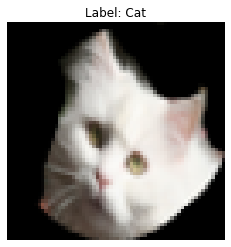

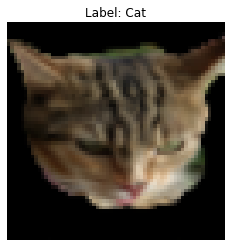

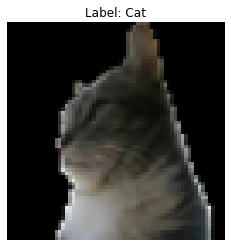

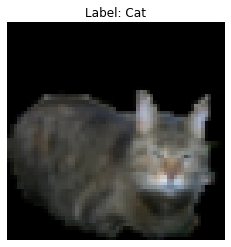

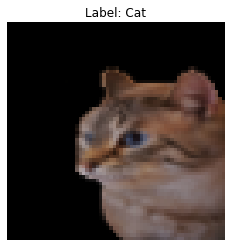

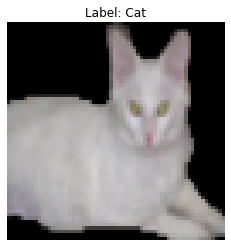

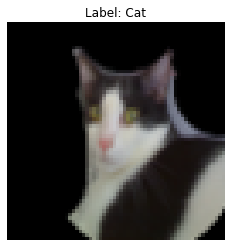

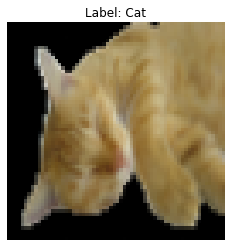

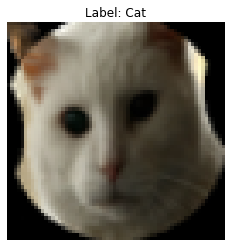

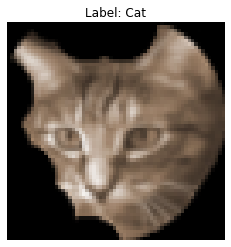

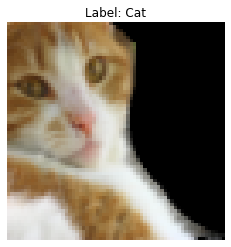

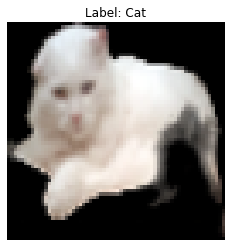

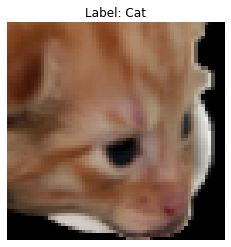

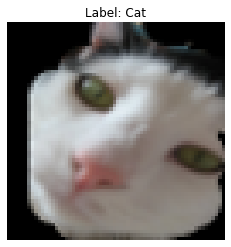

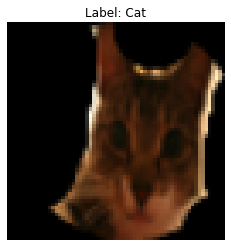

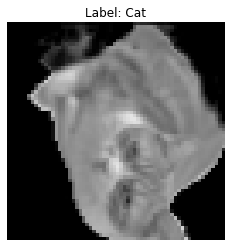

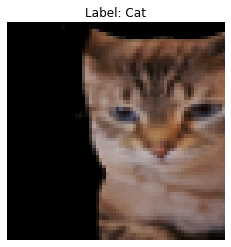

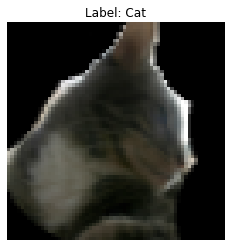

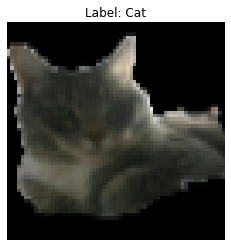

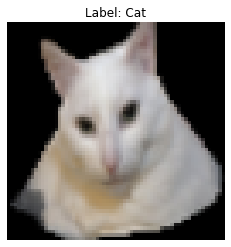

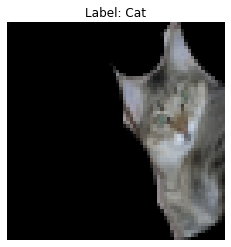

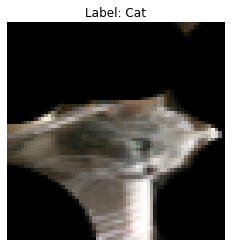

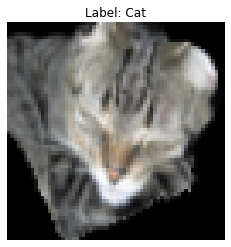

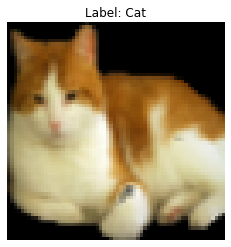

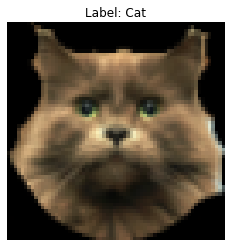

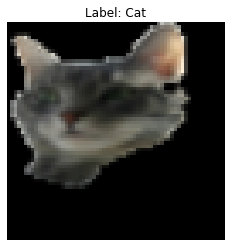

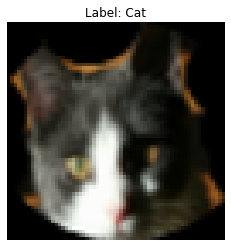

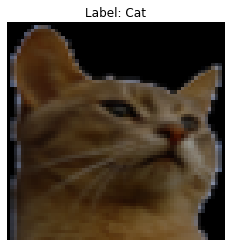

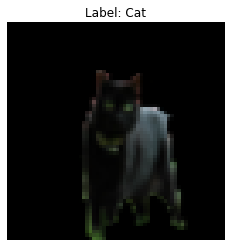

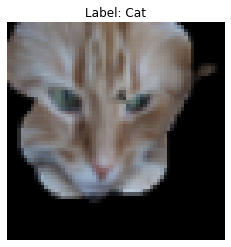

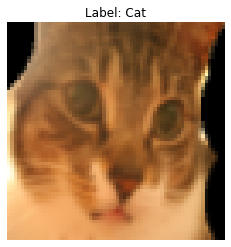

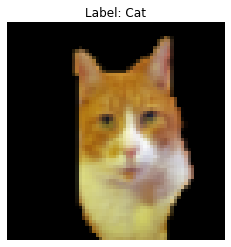

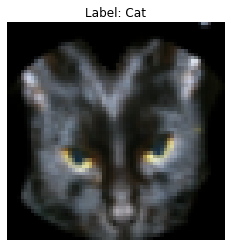

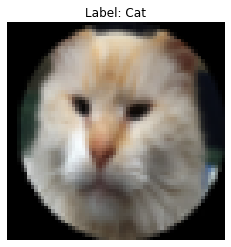

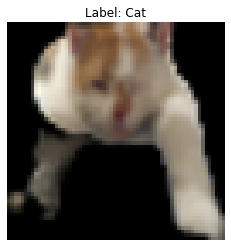

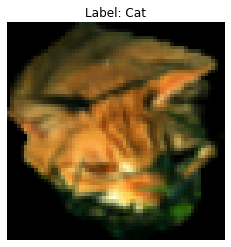

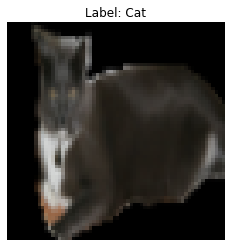

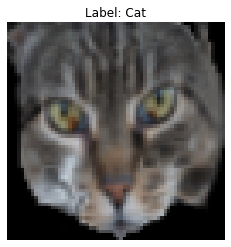

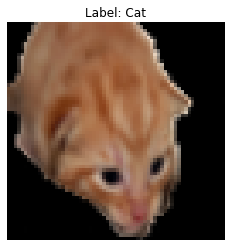

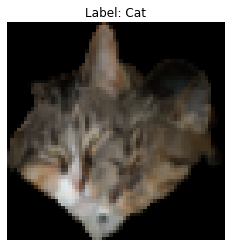

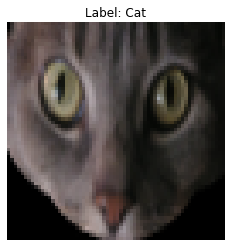

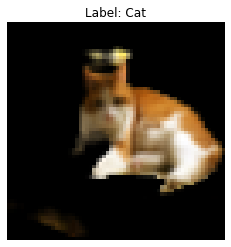

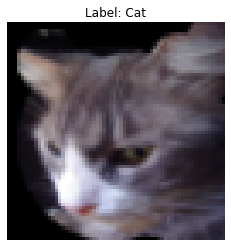

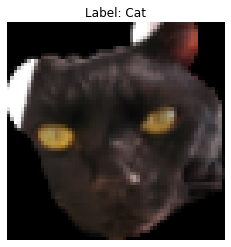

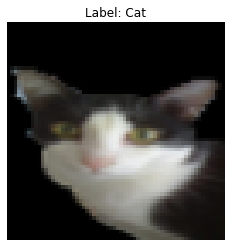

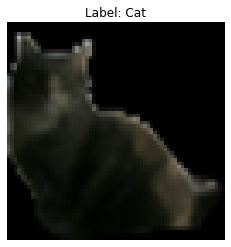

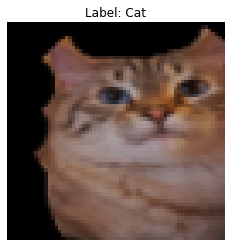

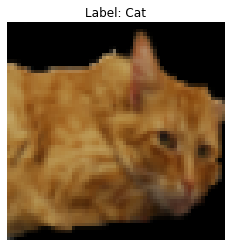

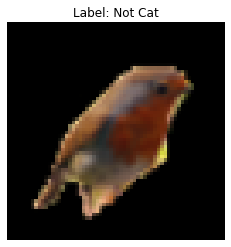

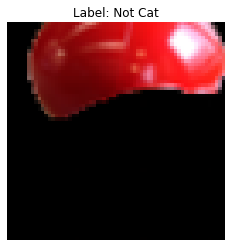

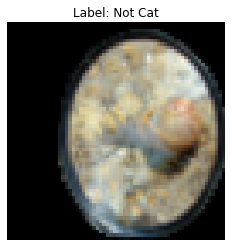

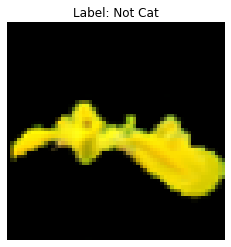

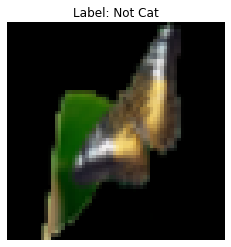

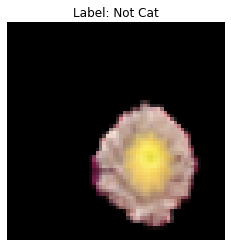

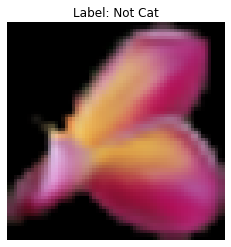

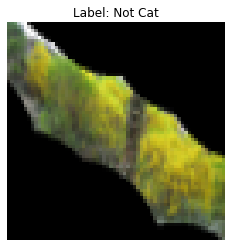

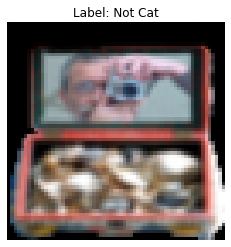

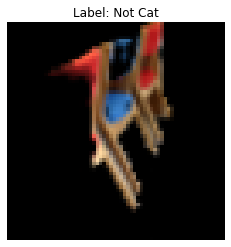

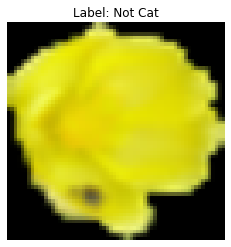

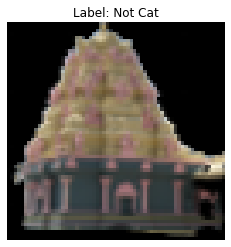

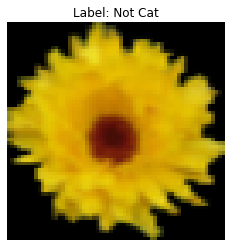

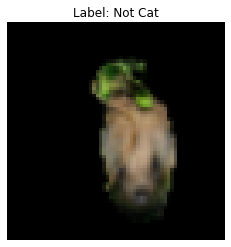

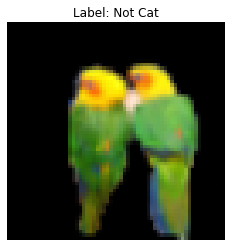

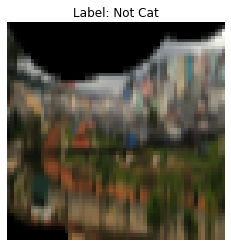

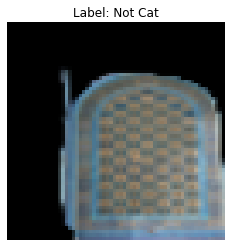

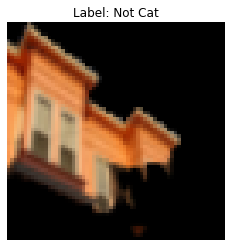

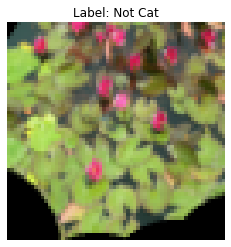

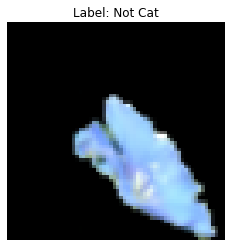

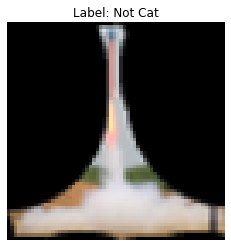

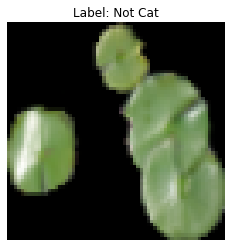

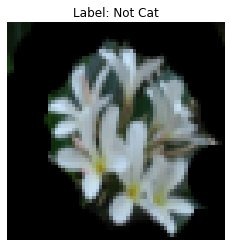

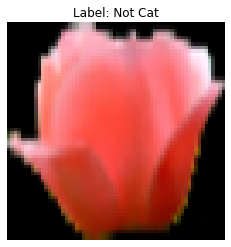

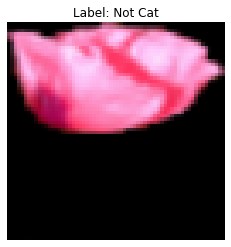

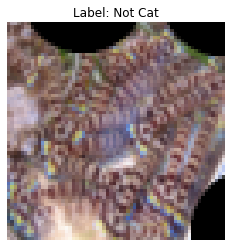

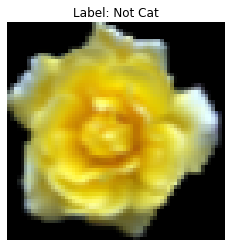

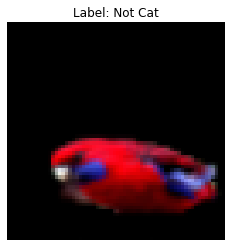

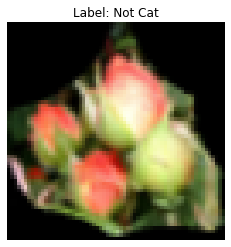

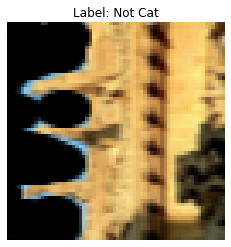

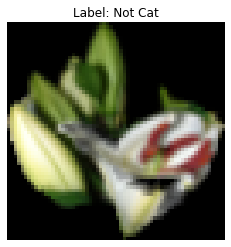

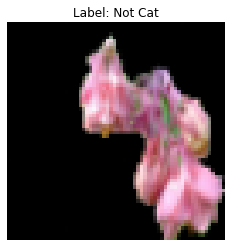

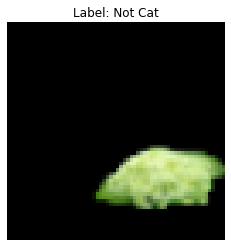

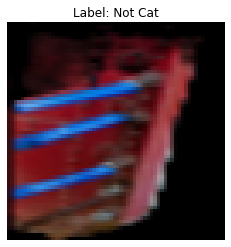

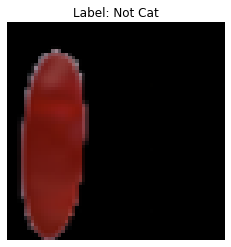

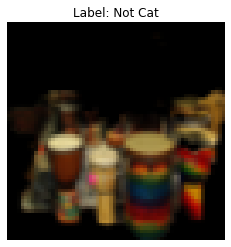

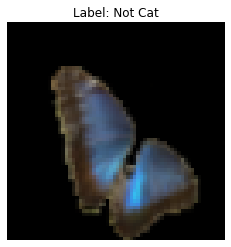

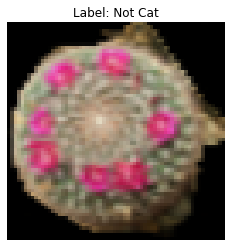

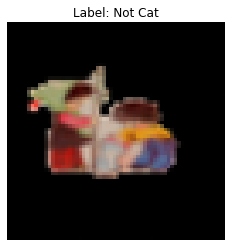

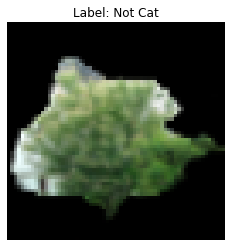

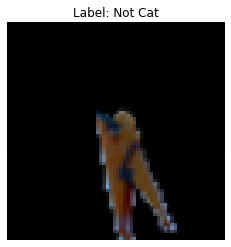

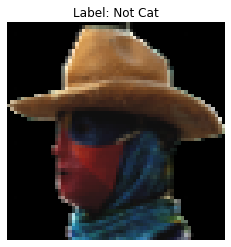

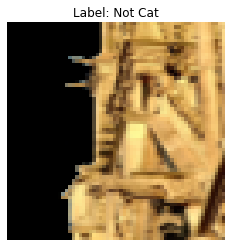

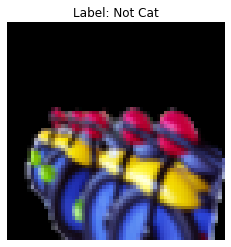

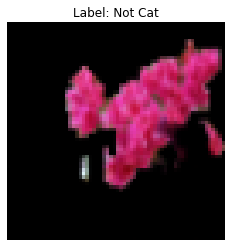

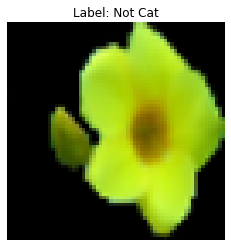

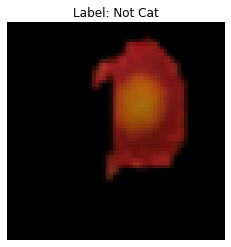

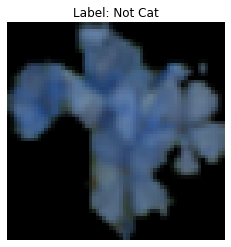

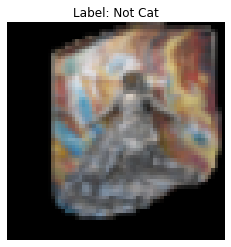

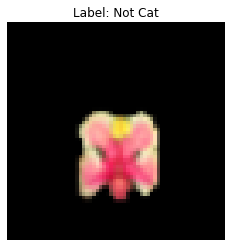

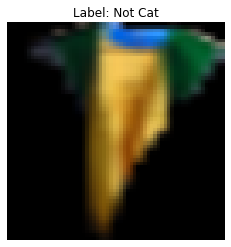

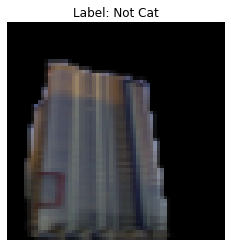

In [9]:
#SHOWS LABELS

import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# Load the HDF5 file
file_path = "all_datasets/datasets_second_correct_alex_edit/train_catvnoncat.h5"

with h5py.File(file_path, "r") as f:
    # Print available keys in the file
    # for i in range(labels.shape[0]):
    #     print(pd.aggregate(((f.keys(i) == 'Cat'))))
    print("Keys in the HDF5 file:", list(f.keys()))  

    # Assuming images are stored under 'train_set_x' and labels under 'train_set_y'
    images = np.array(f["train_set_x"])  
    labels = np.array(f["train_set_y"])  # Labels: 1 = Cat, 0 = Not Cat

    print(f"Dataset shape: {images.shape}")  # Check the shape (num_samples, height, width, channels)
    print(f"Labels shape: {labels.shape}")

    # Display the first image with label
    for i in range(0,100):
        plt.imshow(images[i])
        plt.title(f"Label: {'Cat' if labels[i] == 1 else 'Not Cat'}")  # Changed labels[0] to labels[i]
        plt.axis("off")
        plt.show()



In [59]:
from PIL import Image
import os

def add_black_background_to_folder(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            
            # Open and process image
            img = Image.open(input_path).convert("RGBA")
            
            # Create black background
            black_background = Image.new("RGBA", img.size, (0, 0, 0, 255))
            
            # Composite image over background
            final_img = Image.alpha_composite(black_background, img)
            
            # Convert to RGB and resize
            final_img = final_img.convert("RGB").resize((64, 64))
            
            # Save processed image
            final_img.save(output_path)
            print(f"Processed: {filename}")

# Example usage
input_folder = "extr/train"
output_folder = "path/to/output/folder"

add_black_background_to_folder("extr_alex/train", "extr_alex/train")
add_black_background_to_folder("extr_alex/test", "extr_alex/test")


In [74]:
from PIL import Image, ImageOps
import os

def add_black_padding(input_path, output_path, padding=4):
    # Open the image and convert to RGBA to handle transparency
    img = Image.open(input_path).convert("RGBA")
    
    # Add black padding
    padded_img = ImageOps.expand(img, border=padding, fill="black")
    
    # Convert back to RGB and save
    padded_img = padded_img.convert("RGB")
    padded_img.save(output_path)

# Example usage for a single image
def pad_single_image(input_path, output_path):
    add_black_padding(input_path, output_path)

# Example usage for all images in a folder
def pad_folder_images(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            add_black_padding(input_path, output_path)
            print(f"Processed: {filename}")

pad_folder_images("extr_alex/train", "extr_alex_padding/train")
pad_folder_images("extr_alex/test", "extr_alex_padding/test")

Processed: cat_153.png
Processed: not_cat_66.png
Processed: cat_29.png
Processed: not_cat_103.png
Processed: cat_14.png
Processed: cat_144.png
Processed: not_cat_114.png
Processed: not_cat_3.png
Processed: not_cat_70.png
Processed: not_cat_64.png
Processed: cat_192.png
Processed: cat_179.png
Processed: cat_145.png
Processed: not_cat_74.png
Processed: cat_13.png
Processed: not_cat_49.png
Processed: cat_197.png
Processed: cat_156.png
Processed: cat_142.png
Processed: not_cat_77.png
Processed: not_cat_4.png
Processed: not_cat_5.png
Processed: not_cat_89.png
Processed: not_cat_76.png
Processed: cat_124.png
Processed: not_cat_160.png
Processed: cat_88.png
Processed: not_cat_10.png
Processed: cat_60.png
Processed: cat_126.png
Processed: cat_136.png
Processed: not_cat_17.png
Processed: not_cat_172.png
Processed: cat_71.png
Processed: cat_59.png
Processed: cat_109.png
Processed: cat_121.png
Processed: not_cat_28.png
Processed: not_cat_158.png
Processed: not_cat_165.png
Processed: not_cat_15.pn

In [5]:
from PIL import Image
import numpy as np

def crop_black_borders(image_path, output_path):
    # Open the image and convert to RGB
    img = Image.open(image_path).convert("RGB")
    
    # Convert to numpy array for easier processing
    img_array = np.array(img)
    
    # Create mask of non-black pixels
    non_black_mask = np.any(img_array != [0, 0, 0], axis=-1)
    
    # Find the bounding coordinates of non-black content
    coords = np.argwhere(non_black_mask)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0) + 1  # Add 1 to include the last pixel
    
    # Crop the image
    cropped_img = img.crop((x_min, y_min, x_max, y_max))
    
    # Save the cropped image
    cropped_img.save(output_path)

# Example usage for a single image
# crop_black_borders("input.png", "output.png")

# For processing multiple images in a folder
def process_folder(input_folder, output_folder):
    import os
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            try:
                crop_black_borders(input_path, output_path)
                print(f"Processed: {filename}")
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

# Example usage for a folder
process_folder("all_extracted_images/extr_alt/train", "all_extracted_images/extr_alt_cropped/train")
process_folder("all_extracted_images/extr_alt/test", "all_extracted_images/extr_alt_cropped/test")

Processed: cat_153.png
Processed: not_cat_66.png
Processed: cat_29.png
Processed: not_cat_103.png
Processed: cat_14.png
Processed: cat_144.png
Processed: not_cat_114.png
Processed: not_cat_3.png
Processed: not_cat_70.png
Processed: not_cat_64.png
Processed: cat_192.png
Processed: cat_179.png
Processed: cat_145.png
Processed: not_cat_74.png
Processed: cat_13.png
Processed: not_cat_49.png
Processed: cat_197.png
Processed: cat_156.png
Processed: cat_142.png
Processed: not_cat_77.png
Processed: not_cat_4.png
Processed: not_cat_5.png
Processed: not_cat_89.png
Processed: not_cat_76.png
Processed: cat_124.png
Processed: cat_88.png
Processed: not_cat_10.png
Processed: cat_60.png
Processed: cat_126.png
Processed: cat_136.png
Processed: not_cat_17.png
Processed: cat_71.png
Processed: cat_59.png
Processed: cat_109.png
Processed: cat_121.png
Processed: not_cat_28.png
Processed: not_cat_15.png
Processed: cat_108.png
Processed: cat_111.png
Processed: not_cat_30.png
Processed: not_cat_18.png
Processe